# Desafío - Clasificación desde Machine Learning

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

__Descripción__

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de
ésta se registran las siguientes observaciones:

- default : Variable binaria. Registra si el cliente entró en morosidad o no.
- income : Ingreso promedio declarado por el cliente.
- balance : Total de saldo en la cuenta de crédito.
- student : Variable binaria. Registra si el cliente es estudiante o no.

## Preparación del ambiente de trabajo

- Importe los módulos básicos para el análisis de datos
    - Importe seaborn.
    - Importe statsmodels.
    - Importe LogisticRegression, train_test_split, StandardScaler, classification_report y roc_curve de sklearn

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.display import display, Markdown

df = pd.read_csv("default_credit.csv", index_col=0)

display(df.info(memory_usage=False))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)

None

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


## Análisis exploratorio
- Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    - Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    - Un boxplot del balance total de las cuentas, segmentado por el status de default.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    - Un diagrama de dispersión entre balance e income, segmentado por el status de
estudiante.
    - Un diagrama de dispersión entre balance e income , segmentado por el status de
default.
- Comente brevemente sobre los principales patrones de comportamiento.
    - **Comentarios**
        - A partir de lo observado en las gráficas, se ve:
            1. Un estudiante está más endeudado que otro cliente.
            2. El ingreso mediano y su variabilidad es mucho menor en el caso de que el cliente sea estudiante.
            3. El saldo de crédito es mayor en un cliente moroso.
            4. El ingreso mediano es levemente inferior en un cliente moroso.
            5. A medida que aumentan los ingresos de un estudiante, disminuye levemente su saldo de crédito. En promedio, el saldo de crédito es el mismo sin importar el nivel de ingreso para un cliente que no estudia. 
            6. A mayor ingreso menor es el saldo de crédito, sin importar si el cliente está en morosidad. Ambas rectas promedio tienen una pendiente similar. 
- tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.

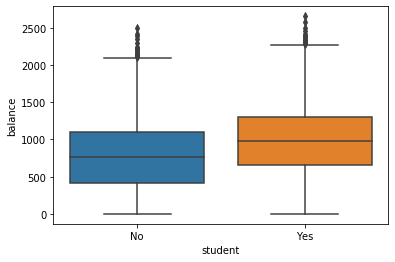

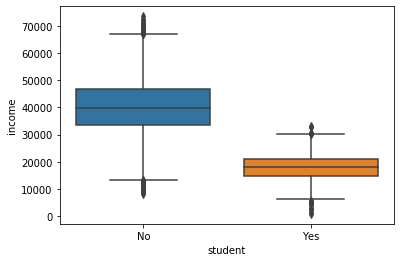

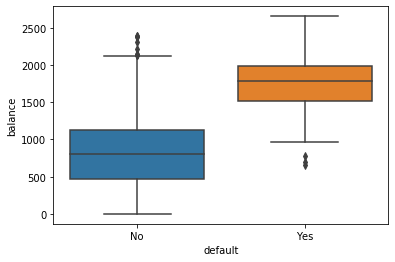

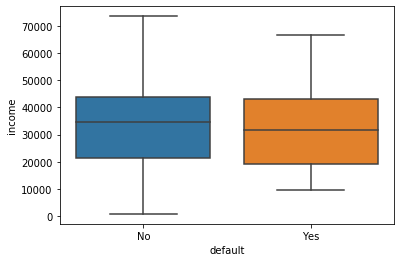

<Figure size 432x288 with 0 Axes>

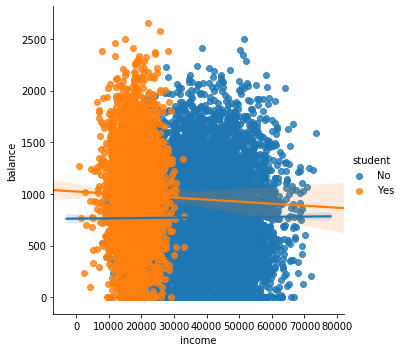

<Figure size 432x288 with 0 Axes>

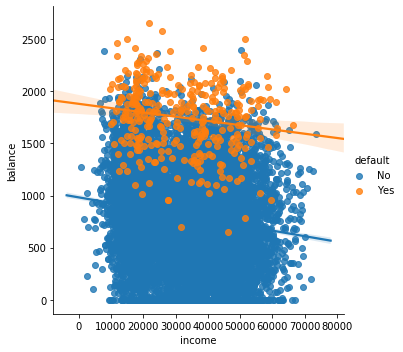

In [104]:
plt.figure()

ax = sns.boxplot(
    x="student",
    y="balance",
    data=df
)

plt.figure()

ax = sns.boxplot(
    x="student",
    y="income",
    data=df
)

plt.figure()

ax = sns.boxplot(
    x="default",
    y="balance",
    data=df
)

plt.figure()

ax = sns.boxplot(
    x="default",
    y="income",
    data=df
)

plt.figure()

ax = sns.lmplot(
    x="income",
    y="balance",
    hue="student",
    data=df
)

plt.figure()

ax = sns.lmplot(
    x="income",
    y="balance",
    hue="default",
    data=df
)

## Modelación econométrica

- Recodifique las variables student y default para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:
    
    $$log \left( \frac{Pr(default=1)}{1-Prd(default=1)} \right) = \beta_0 + \beta_1 \bullet balance + \beta_2 \bullet income + \beta_3 \bullet student$$
    
- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos. 
    - **Respuesta**
        - A partir del primer modelo, se notó que income no era estadísticamente significativa (95%), por lo que se elimina esa variable del modelo 2 refactorizado.

In [105]:
display(Markdown("""**Value counts (porcentaje) de columnas default y student**"""))

display(pd.DataFrame(df["default"].value_counts("%")))
display(pd.DataFrame(df["student"].value_counts("%")))

display(Markdown("""En ambos casos el valor que más se repite es 'No', 
 por lo tanto 'No' se binarizará como el valor 0, y 'Yes' como 1, en teoría más difícil de 
 predecir por haber menos datos de entrenamiento"""))

# Recodifica

df["default"] = df["default"].map({'Yes': 1, 'No': 0})
df["student"] = df["student"].map({'Yes': 1, 'No': 0})

# Implementa modelo

display(Markdown("""**Resumen modelo logit 1: default~balance+income+student**"""))

modelo1 = smf.logit('default~balance+income+student', df).fit()
display(modelo1.summary())

display(Markdown("""**Resumen modelo logit refactorizado 2: default~balance+student**"""))
modelo2 = smf.logit('default~balance+student', df).fit()
display(modelo2.summary())

**Value counts (porcentaje) de columnas default y student**

,default
No,0.9667
Yes,0.0333


,student
No,0.7056
Yes,0.2944


En ambos casos el valor que más se repite es 'No', 
 por lo tanto 'No' se binarizará como el valor 0, y 'Yes' como 1, en teoría más difícil de 
 predecir por haber menos datos de entrenamiento

**Resumen modelo logit 1: default~balance+income+student**

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        23:30:49   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Resumen modelo logit refactorizado 2: default~balance+student**

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        23:30:49   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
- Estandarize la matriz de atributos.
- Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
- Implemente el modelo sin alterar los hiperparámetros.
- Genere la predicción de las clases y de la probabilidad.
- Reporte las métricas de precision, recall y f1 para ambas clases.
- Grafique la curva Receiver Operator Characteristic.
- En base a los pasos, comente sobre el desempeño predictivo del modelo.
    - **Comentarios:**
        - Se analizan las métricas:
            - Precision:  Tiene alta tasa de predicción 97% para clientes no morosos, y para clientes morosos tiene una tasa del 75%. Lo que se explica por los datos de entrenamiento, había una mayor cantidad para casos "No" morosos, por lo tanto hay más precisión para casos no morosos.
            - Recall: Predijo sólo el 25,6% de los casos morosos y un 97,3% de los no morosos. 
            - Área bajo la curva: tiene un rendimiendo de un 95,8%.
            - Debido que los datos no están balanceados (gran cantidad de datos para "No" morosos y pocos para "Yes"), se consideran los parámetros Precision y Recall como mejores medidores de la calidad de la predicción que la curva ROC.

/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Métricas de modelo estimado**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.984945,0.382166,0.970606,0.683555,0.963574
precision,0.973313,0.750000,0.970606,0.861656,0.965395
recall,0.996858,0.256410,0.970606,0.626634,0.970606
support,3183.000000,117.000000,0.970606,3300.000000,3300.000000


**Área bajo la curva de ROC**

0.958

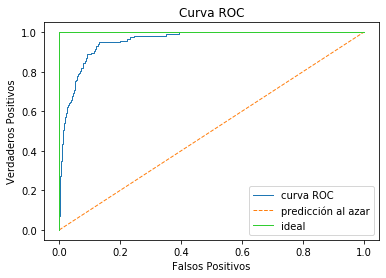

In [107]:
# Genera subconjunto de entrenamiento y validación

atributos = ["balance", "student"]
objetivo = ["default"]

X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, atributos],
    df.loc[:, objetivo],
    test_size=.33,
    random_state=8858537
)

# Estandariza matriz de atributos

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Implementa modelo

modelo3 = LogisticRegression().fit(X_train_std, y_train)

# Genera predicción de clases y probabilidades

yhat = modelo3.predict(X_test_std)
yhat_prob = modelo3.predict_proba(X_test_std)[:, 1]

# Reporta métricas

display(Markdown("**Métricas de modelo estimado**"))
display(pd.DataFrame(
    classification_report(
        y_test,
        yhat,
        output_dict=True
    )))

# Genera objetos de roc_curve

false_positive, true_positive, threshold = roc_curve(y_test, yhat_prob)

# Plot ROC curve

plt.figure()
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1, label="curva ROC")
plt.plot([0, 1], ls="--", lw=1, label="predicción al azar")
plt.plot([0, 0], [1, 0], c='limegreen', lw=1, label="ideal")
plt.plot([1, 1], c='limegreen', lw=1)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.legend()

display(Markdown("**Área bajo la curva de ROC**"))
display(round(roc_auc_score(y_test, yhat_prob),3))